In [1]:
# Final project: 32100-81
# Names: Jim Tinley
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy as scp
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score

sns.set_theme(style = "ticks")

%matplotlib inline

In [2]:
# reading in our cross-sectional dataset with 436 total observations 
# (416 are the first MRI scan, 20 observations are a second MRI scan administered to 20 individuals without dementia symptoms)

fp_cs = pd.read_csv("MRI_and_alzheimers_cross_sectional_data.csv", index_col=0)
fp_cs

,gender,dominant_hand,age_in_years,education_level,socioeconomic_status_(SES),mini_mental_state_examination_(MMSE),clinical_dementia_rating_(CDR),estimated_total_intracranial_volume_(eTIV),normalize_whole_brain_volume_(nWBV),atlas_scaling _factor_(ASF),Delay
ID,,,,,,,,,,,
OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...
OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0


In [3]:
# removing the observations for those who recieved a second MRI scan (ID's ending in MR2), we will use only first MRI scans in our analysis 
# removing dominant hand and delay columns 

MR1_df = fp_cs.head(416)
MR1_df = MR1_df.drop(columns = ['dominant_hand','Delay'])
MR1_df.head()

,gender,age_in_years,education_level,socioeconomic_status_(SES),mini_mental_state_examination_(MMSE),clinical_dementia_rating_(CDR),estimated_total_intracranial_volume_(eTIV),normalize_whole_brain_volume_(nWBV),atlas_scaling _factor_(ASF)
ID,,,,,,,,,
OAS1_0001_MR1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
OAS1_0002_MR1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
OAS1_0003_MR1,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
OAS1_0004_MR1,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
OAS1_0005_MR1,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


In [4]:
# creating gender binary (F=0, M=1)

MR1_df["gender"] = pd.get_dummies(MR1_df["gender"], drop_first=True)
MR1_df.head()

,gender,age_in_years,education_level,socioeconomic_status_(SES),mini_mental_state_examination_(MMSE),clinical_dementia_rating_(CDR),estimated_total_intracranial_volume_(eTIV),normalize_whole_brain_volume_(nWBV),atlas_scaling _factor_(ASF)
ID,,,,,,,,,
OAS1_0001_MR1,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
OAS1_0002_MR1,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
OAS1_0003_MR1,0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
OAS1_0004_MR1,1,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
OAS1_0005_MR1,1,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


In [5]:
# checking for the total number of individuals who did not recieve a CDR score (CDR="NaN")
# removing observations for those without a CDR rating, and saving this as a new dataframe CDR_df
# assessing our final dataframe (CDR_df) which will be split into train and test sets

print(MR1_df['clinical_dementia_rating_(CDR)'].isna().sum())
CDR_df = MR1_df.dropna(subset=["clinical_dementia_rating_(CDR)","socioeconomic_status_(SES)"])
print(CDR_df.info())
CDR_df.head()

181
<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, OAS1_0001_MR1 to OAS1_0457_MR1
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   gender                                      216 non-null    uint8  
 1   age_in_years                                216 non-null    int64  
 2   education_level                             216 non-null    float64
 3   socioeconomic_status_(SES)                  216 non-null    float64
 4   mini_mental_state_examination_(MMSE)        216 non-null    float64
 5   clinical_dementia_rating_(CDR)              216 non-null    float64
 6   estimated_total_intracranial_volume_(eTIV)  216 non-null    int64  
 7   normalize_whole_brain_volume_(nWBV)         216 non-null    float64
 8   atlas_scaling _factor_(ASF)                 216 non-null    float64
dtypes: float64(6), int64(2), uint8(1)
memory usage: 15.4+ KB
None


,gender,age_in_years,education_level,socioeconomic_status_(SES),mini_mental_state_examination_(MMSE),clinical_dementia_rating_(CDR),estimated_total_intracranial_volume_(eTIV),normalize_whole_brain_volume_(nWBV),atlas_scaling _factor_(ASF)
ID,,,,,,,,,
OAS1_0001_MR1,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
OAS1_0002_MR1,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
OAS1_0003_MR1,0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
OAS1_0010_MR1,1,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
OAS1_0011_MR1,0,52,3.0,2.0,30.0,0.0,1321,0.827,1.329


In [6]:
# converting the variable "normalize_whole_brain_volume_(nWBV)" which is a proportion to a %
# renaming the "normalize_whole_brain_volume_(nWBV)" to 'normalize_whole_brain_volume%_(nWBV%)'

CDR_df["normalize_whole_brain_volume_(nWBV)"] = CDR_df["normalize_whole_brain_volume_(nWBV)"] * 100
CDR_df = CDR_df.rename(columns={'normalize_whole_brain_volume_(nWBV)':'normalize_whole_brain_volume%_(nWBV%)'})
CDR_df.head()

/var/folders/j6/2lfv085x40l_56nv2lqghns40000gn/T/ipykernel_18163/2265142356.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CDR_df["normalize_whole_brain_volume_(nWBV)"] = CDR_df["normalize_whole_brain_volume_(nWBV)"] * 100


,gender,age_in_years,education_level,socioeconomic_status_(SES),mini_mental_state_examination_(MMSE),clinical_dementia_rating_(CDR),estimated_total_intracranial_volume_(eTIV),normalize_whole_brain_volume%_(nWBV%),atlas_scaling _factor_(ASF)
ID,,,,,,,,,
OAS1_0001_MR1,0,74,2.0,3.0,29.0,0.0,1344,74.3,1.306
OAS1_0002_MR1,0,55,4.0,1.0,29.0,0.0,1147,81.0,1.531
OAS1_0003_MR1,0,73,4.0,3.0,27.0,0.5,1454,70.8,1.207
OAS1_0010_MR1,1,74,5.0,2.0,30.0,0.0,1636,68.9,1.073
OAS1_0011_MR1,0,52,3.0,2.0,30.0,0.0,1321,82.7,1.329


In [7]:
# checking the unique CDR score values in our dataset
# creating binary condition: 1 = clinical dementia symptoms (CDR > 0), 0 = no dementia symptoms (CDR=0).
# checking the total number of individuals with CDR > 0 

print(CDR_df["clinical_dementia_rating_(CDR)"].unique())
CDR_df["dementia_binary"] = np.where(CDR_df["clinical_dementia_rating_(CDR)"] > 0, 1, 0)
CDR_df["dementia_binary"].sum()

[0.  0.5 1.  2. ]


83

/Users/Jim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dementia_binary', ylabel='count'>

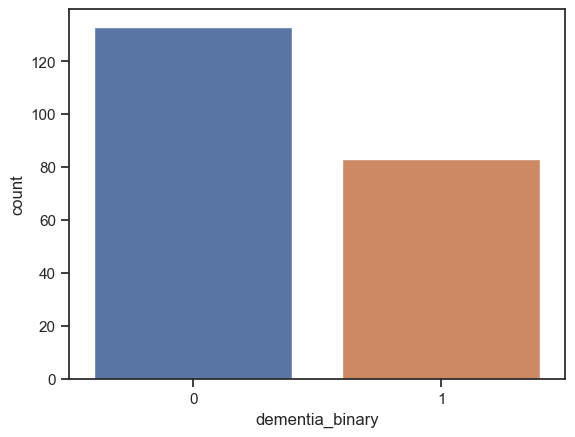

In [8]:
# plotting the dementia_binary variable to get a rough idea of our data

sns.countplot(CDR_df["dementia_binary"])

In [9]:
# spliting our data into train and test sets for our logistic regression model

np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(CDR_df[['age_in_years',
                                                            'gender',
                                                            'education_level',
                                                            'socioeconomic_status_(SES)',
                                                            'mini_mental_state_examination_(MMSE)',
                                                            'normalize_whole_brain_volume%_(nWBV%)']],
                                                    CDR_df['dementia_binary'], test_size=0.3)

print(y_train)
X_train

ID
OAS1_0082_MR1    1
OAS1_0216_MR1    0
OAS1_0358_MR1    0
OAS1_0188_MR1    0
OAS1_0401_MR1    0
                ..
OAS1_0032_MR1    0
OAS1_0221_MR1    0
OAS1_0143_MR1    1
OAS1_0278_MR1    1
OAS1_0247_MR1    1
Name: dementia_binary, Length: 151, dtype: int64


,age_in_years,gender,education_level,socioeconomic_status_(SES),mini_mental_state_examination_(MMSE),normalize_whole_brain_volume%_(nWBV%)
ID,,,,,,
OAS1_0082_MR1,75,0,2.0,3.0,28.0,77.6
OAS1_0216_MR1,71,0,4.0,3.0,30.0,79.2
OAS1_0358_MR1,65,1,3.0,3.0,29.0,83.9
OAS1_0188_MR1,48,1,4.0,2.0,30.0,79.0
OAS1_0401_MR1,54,0,4.0,3.0,29.0,82.7
...,...,...,...,...,...,...
OAS1_0032_MR1,89,1,4.0,1.0,28.0,68.2
OAS1_0221_MR1,94,0,5.0,1.0,29.0,69.6
OAS1_0143_MR1,66,1,2.0,4.0,30.0,78.4


In [10]:
# using the statsmodels.api package to get coefs for our independent variables

log_reg_s = sm.Logit(y_train, X_train).fit()
print(log_reg_s.summary())

Optimization terminated successfully.
         Current function value: 0.371265
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        dementia_binary   No. Observations:                  151
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                            5
Date:                Sat, 12 Nov 2022   Pseudo R-squ.:                  0.4271
Time:                        12:09:02   Log-Likelihood:                -56.061
converged:                       True   LL-Null:                       -97.857
Covariance Type:            nonrobust   LLR p-value:                 1.485e-16
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
age_in_years                              0.1002      

In [11]:
# using the sklearn package to create our logistic regression ML model

log_reg_ML = LogisticRegression(fit_intercept=False, C = 1e9)
log_reg_ML.fit(X_train,y_train)
print(log_reg_ML.get_params())

{'C': 1000000000.0, 'class_weight': None, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [12]:
# checking that the coefs derived from the statsmodels.api package match the sklearn coefs
# ** note both packages were used to access different features for our logisitic regression model
# the statsmodels.api package is used for the function "log_reg_s"; and the sklearn package is used for "log_reg_ML" **
# converting the coefs to Odds Ratios: e^[coefficient]

print(log_reg_ML.coef_)
print("Coefficients: \n", log_reg_s.params)
print("Odds Ratios: \n", np.exp(log_reg_ML.coef_))

[[ 0.10021515  0.71288725  0.275442    0.37527605 -0.69365922  0.11884074]]
Coefficients: 
 age_in_years                             0.100213
gender                                   0.712882
education_level                          0.275433
socioeconomic_status_(SES)               0.375274
mini_mental_state_examination_(MMSE)    -0.693646
normalize_whole_brain_volume%_(nWBV%)    0.118838
dtype: float64
Odds Ratios: 
 [[1.10540872 2.03987239 1.31711271 1.45539313 0.49974404 1.12619055]]


In [13]:
# getting accuracy score for our model

y_pred = log_reg_ML.predict(X_test)
log_reg_ML.score(X_test, y_test)

0.7692307692307693

In [14]:
# creating matrix

confusion_matrix(y_test, y_pred)

array([[31,  4],
       [11, 19]])

/Users/Jim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


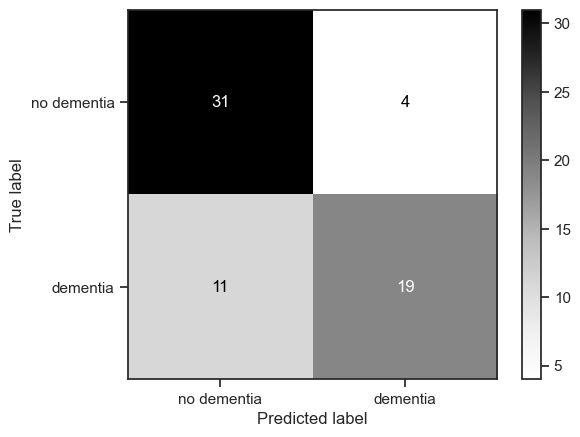

In [15]:
# plotting matrix

plot_confusion_matrix(log_reg_ML, X_test, y_test, cmap='Greys', display_labels=['no dementia','dementia'])
plt.show()


In [16]:
# checking matrix data is correct

print("Test set data", "\n")
print("total observations",y_test.count())
print("True # of individuals who do not have dementia:", y_test.count()-y_test.sum())
print("True # of individuals who do have dementia:", y_test.sum())

print("Predicted # of individuals who do not have dementia:", y_test.count()-y_pred.sum())
print("Predicted # of individuals who do have dementia:", y_pred.sum())

Test set data 

total observations 65
True # of individuals who do not have dementia: 35
True # of individuals who do have dementia: 30
Predicted # of individuals who do not have dementia: 42
Predicted # of individuals who do have dementia: 23


<AxesSubplot:xlabel='age_in_years', ylabel='dementia_binary'>

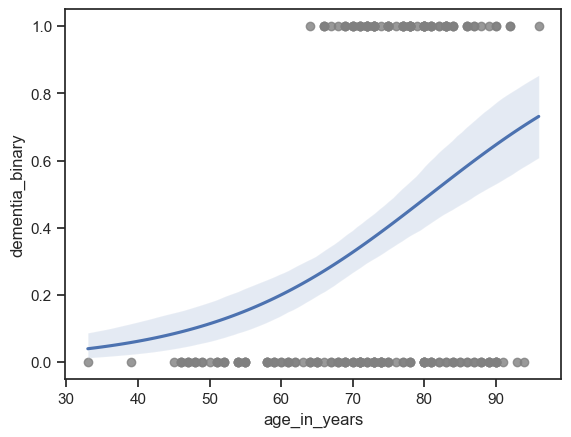

In [17]:
# data exploration

sns.regplot(x=CDR_df["age_in_years"], y=CDR_df["dementia_binary"], logistic=True, 
            scatter_kws={"color": "gray"})

<AxesSubplot:xlabel='age_in_years', ylabel='clinical_dementia_rating_(CDR)'>

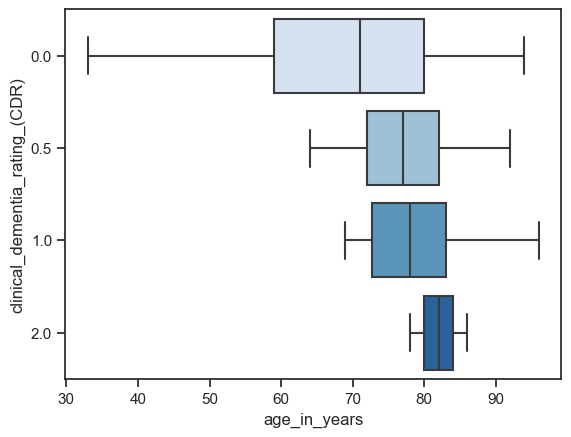

In [18]:
# data exploration

sns.boxplot(data = CDR_df, y="clinical_dementia_rating_(CDR)", x = "age_in_years", orient="h", palette="Blues")

<AxesSubplot:xlabel='mini_mental_state_examination_(MMSE)', ylabel='dementia_binary'>

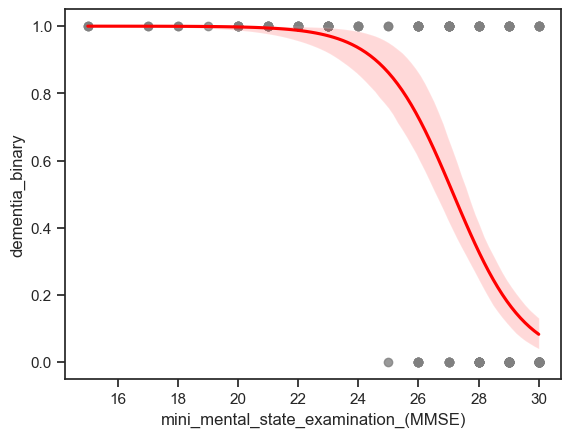

In [19]:
# data exploration

sns.regplot(x=CDR_df["mini_mental_state_examination_(MMSE)"], y=CDR_df["dementia_binary"], logistic=True,
            scatter_kws={"color": "gray"}, 
            line_kws={"color": "red"})

<AxesSubplot:xlabel='mini_mental_state_examination_(MMSE)', ylabel='clinical_dementia_rating_(CDR)'>

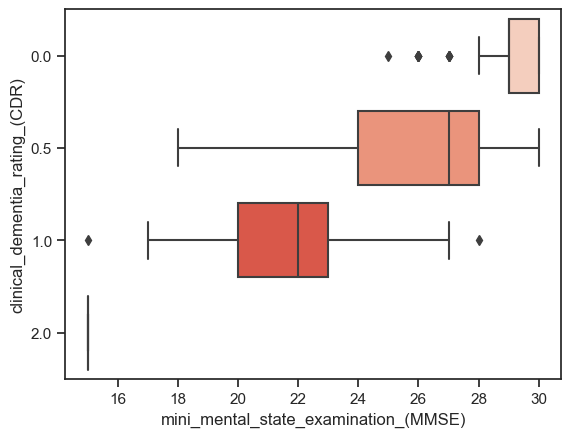

In [20]:


sns.boxplot(data = CDR_df, y="clinical_dementia_rating_(CDR)", x = "mini_mental_state_examination_(MMSE)", orient="h", palette="Reds")

<AxesSubplot:xlabel='normalize_whole_brain_volume%_(nWBV%)', ylabel='dementia_binary'>

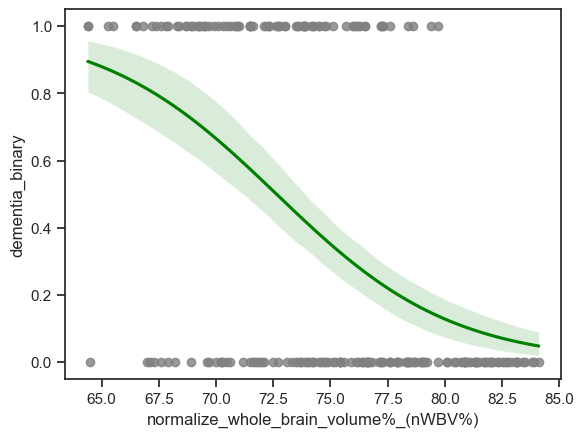

In [21]:
# data exploration 

sns.regplot(x=CDR_df["normalize_whole_brain_volume%_(nWBV%)"], y=CDR_df["dementia_binary"], logistic=True, 
            scatter_kws={"color": "gray"}, 
            line_kws={"color": "green"})

<AxesSubplot:xlabel='normalize_whole_brain_volume%_(nWBV%)', ylabel='clinical_dementia_rating_(CDR)'>

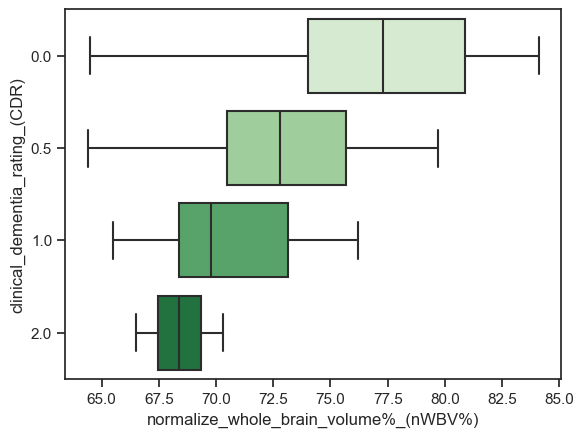

In [22]:
# data exploration

sns.boxplot(data = CDR_df, y="clinical_dementia_rating_(CDR)", x = "normalize_whole_brain_volume%_(nWBV%)", orient="h", palette="Greens")

PearsonRResult(statistic=0.48058700346964034, pvalue=6.987128434605662e-14)


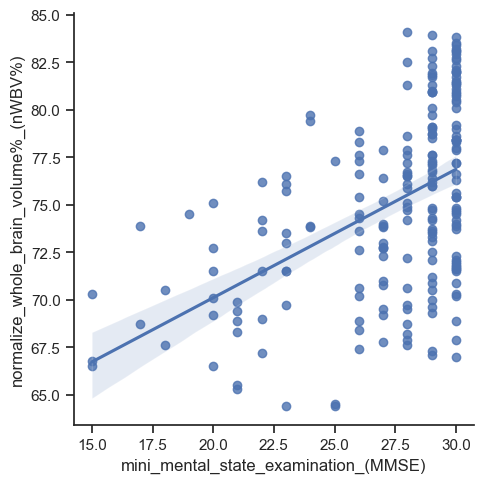

In [23]:
# checking for correlation between nWBV% and MMSE

print(scp.stats.pearsonr(CDR_df['normalize_whole_brain_volume%_(nWBV%)'], CDR_df["mini_mental_state_examination_(MMSE)"]))
sns.lmplot(data = CDR_df, x="mini_mental_state_examination_(MMSE)", y = "normalize_whole_brain_volume%_(nWBV%)")

(r, p-value)
nWBV% v. eTIV: PearsonRResult(statistic=-0.21403067233886125, pvalue=0.0015556867486635649)
nWBV% v. ASF: PearsonRResult(statistic=0.21710668024925311, pvalue=0.0013242524014640566)
eTIV v. ASF: PearsonRResult(statistic=-0.9895179841731602, pvalue=7.841084277403297e-182)


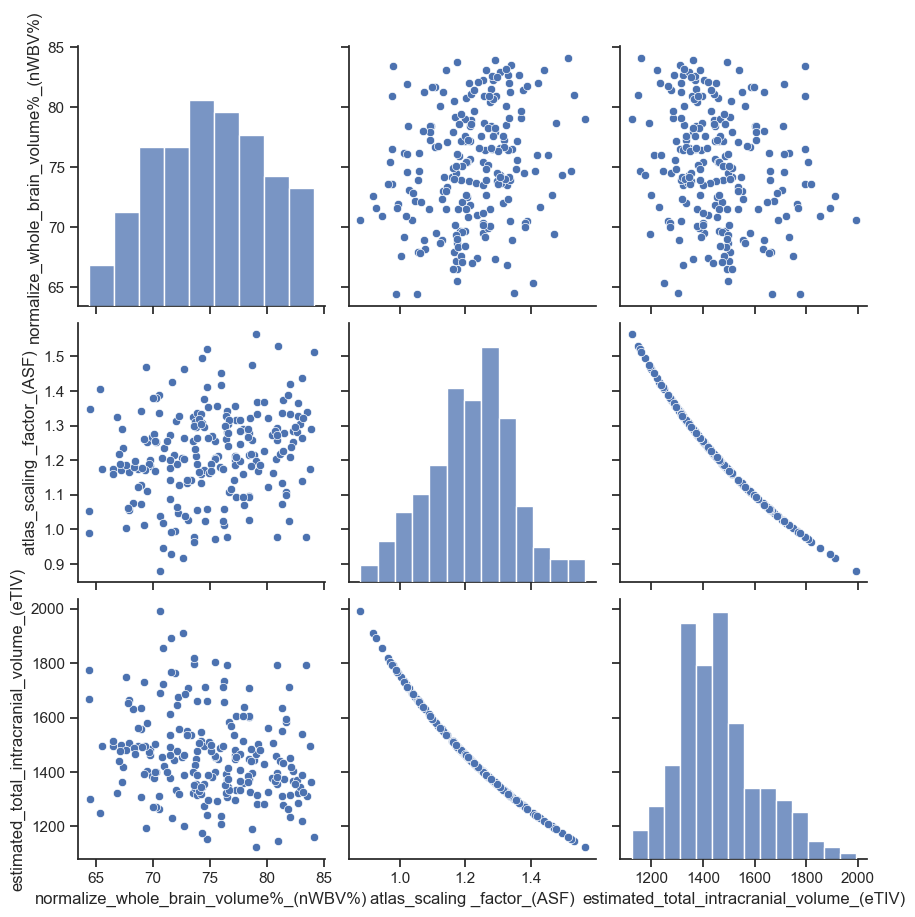

In [24]:
# exploration of relationships among biomedical variables
print("(r, p-value)")
print("nWBV% v. eTIV:", scp.stats.pearsonr(CDR_df['normalize_whole_brain_volume%_(nWBV%)'], CDR_df["estimated_total_intracranial_volume_(eTIV)"]))
print("nWBV% v. ASF:", scp.stats.pearsonr(CDR_df['normalize_whole_brain_volume%_(nWBV%)'], CDR_df["atlas_scaling _factor_(ASF)"]))
print("eTIV v. ASF:", scp.stats.pearsonr(CDR_df["estimated_total_intracranial_volume_(eTIV)"], CDR_df["atlas_scaling _factor_(ASF)"]))
sns.pairplot(CDR_df, vars=["normalize_whole_brain_volume%_(nWBV%)", "atlas_scaling _factor_(ASF)", "estimated_total_intracranial_volume_(eTIV)"], height = 3)